In [1]:
import math

import pandas as pd

df = pd.read_csv('data/4/data.csv')
df

,id,X,Y,Class
0,1,22,86,0
1,2,78,32,1
2,3,54,50,1
3,4,68,80,0
4,5,18,12,0
5,6,85,48,0
6,7,78,10,0
7,8,50,74,0
8,9,30,95,0
9,10,91,12,0


In [2]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3, p=2)
classifier.fit(df[['X', 'Y']], df['Class'])

KNeighborsClassifier(n_neighbors=3)

In [3]:
classifier.kneighbors([[30, 30]], n_neighbors=3)

C:\Users\Quarter\PycharmProjects\MLCourse\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[21.63330765, 31.2409987 , 48.0416486 ]]),
 array([[4, 2, 1]], dtype=int64))

In [4]:
classifier.predict([[30, 30]])

C:\Users\Quarter\PycharmProjects\MLCourse\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [5]:
classifier_1 = KNeighborsClassifier(n_neighbors=3, p=1)
classifier_1.fit(df[['X', 'Y']], df['Class'])

KNeighborsClassifier(n_neighbors=3, p=1)

In [6]:
classifier_1.kneighbors([[30, 30]], n_neighbors=3)

C:\Users\Quarter\PycharmProjects\MLCourse\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[30., 44., 50.]]), array([[4, 2, 1]], dtype=int64))

In [7]:
classifier_1.predict([[30, 30]])

C:\Users\Quarter\PycharmProjects\MLCourse\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# Task 2

In [8]:
df = pd.read_csv('data/4/adult_data_train.csv')
df.drop(['education', 'marital-status'], axis=1, inplace=True)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [9]:
df_without_na = df

for col in ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
    df_without_na = df_without_na[df_without_na[col] != '?']

len(df) - len(df_without_na)

1914

In [29]:
pd.get_dummies(df_without_na, drop_first=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,51,237630,9,7298,0,50,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
import numpy as np

1 - np.round(df['label'].mean(), 3)

0.759

In [12]:
df_numerical = df.drop(['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country'], axis=1)

In [13]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset: pd.DataFrame, column: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    return dataset.drop(column, axis=1), dataset[column]

X, Y = split_dataset(df_numerical, 'label')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27, stratify=df['label'])

In [14]:
np.round(X_train['fnlwgt'].mean(), 3)

190021.844

In [13]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import f1_score

def get_f1_score(dataset):
    X, Y = split_dataset(dataset, 'label')
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27, stratify=df['label'])

    classif = KNeighborsClassifier()
    classif.fit(X_train, Y_train)
    Y_predicted = classif.predict(X_test)
    
    return np.round(f1_score(Y_test, Y_predicted), 3)

In [19]:
get_f1_score(df_numerical)

0.388

In [20]:
from sklearn.preprocessing import MinMaxScaler


def get_f1_score_corrected(dataset):
    X, Y = split_dataset(dataset, 'label')
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=27, stratify=dataset['label'])
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train[:] = scaler.transform(X_train)
    X_test[:] = scaler.transform(X_test)
    
    print(np.round(X_train['fnlwgt'].mean(), 3))

    regressor = KNeighborsClassifier()
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    
    return np.round(f1_score(Y_test, Y_predicted), 3)

In [21]:
get_f1_score_corrected(df_numerical)

0.121


0.518

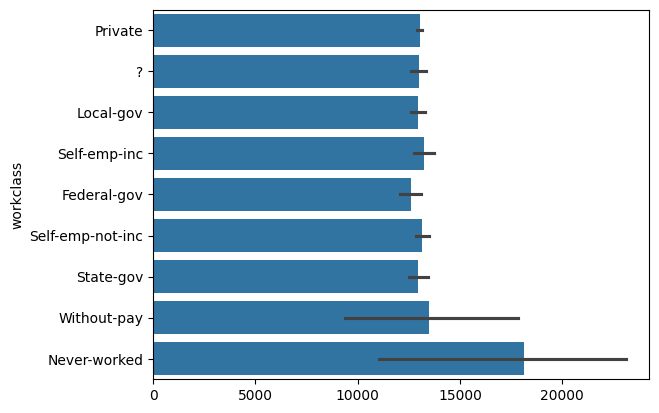

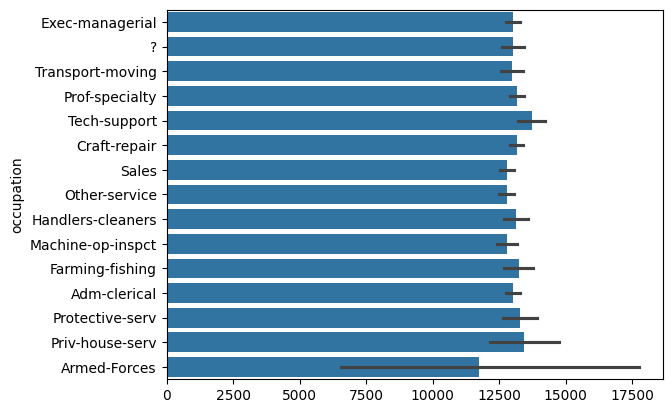

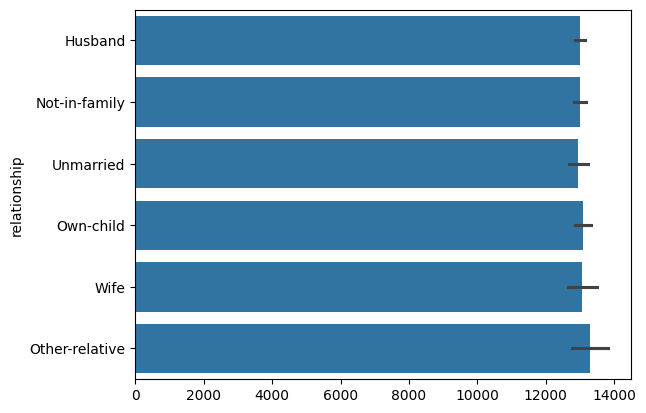

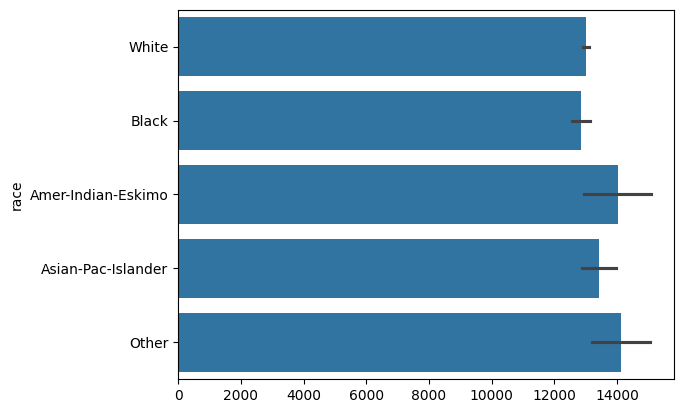

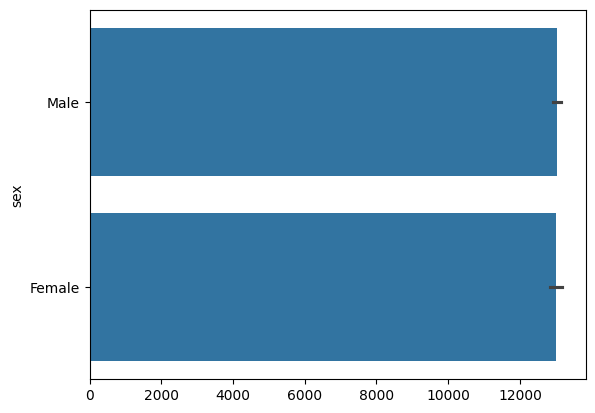

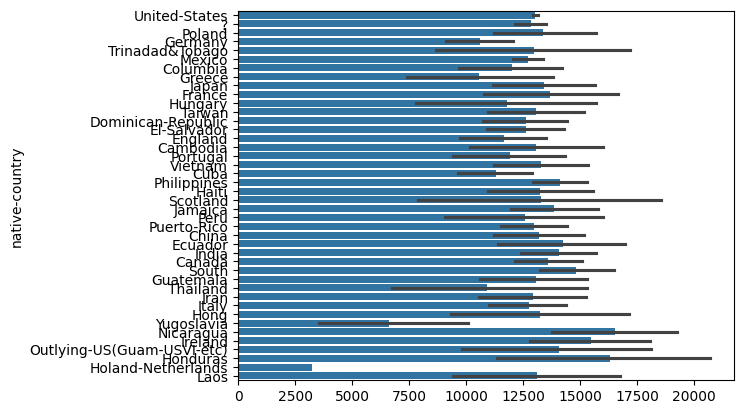

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

for col in df.columns:
    if df.dtypes[col] == object:
        sns.barplot(df[col])
        plt.show()

In [65]:
df_numerical

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
0,32,37210,13,0,0,45,1
1,43,101950,14,0,0,45,0
2,20,122244,9,0,0,28,0
3,40,24763,10,6849,0,40,0
4,24,113936,13,0,0,40,0
...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0
26044,39,421633,10,0,0,30,0
26045,55,82098,9,0,0,55,0
26046,26,50053,13,0,0,55,0


In [26]:
pd.get_dummies(df_without_na, drop_first=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,20,122244,9,0,0,28,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [30]:
df_transformed = pd.get_dummies(df_without_na, drop_first=True)

In [31]:
get_f1_score_corrected(df_transformed)

0.117


0.61

In [35]:
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [33]:
df_filled = df.copy()
for col in df.columns:
    if df.dtypes[col] == object:
        most_frequent = df_filled[col].value_counts().idxmax()
        df_filled[col] = df_filled[col].apply(lambda x: most_frequent if x == '?' else x)
df_filled

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,Private,122244,9,Prof-specialty,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [34]:
df_filled_transformed = pd.get_dummies(df_filled, drop_first=True)
df_filled_transformed

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,20,122244,9,0,0,28,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [36]:
get_f1_score_corrected(df_filled_transformed)

0.121


0.599

# Task 3

In [117]:
count_spam = 27
count_ham = 25

prob_spam = {'Unlimited': 1, 
             'Million': 2, 
             'Money': 1, 
             'Bonus': 7,
             'Purchase': 9, 
             'Offer': 23, 
             'Access': 40, 
             'Remove': 12,
             'Free': 42, 
             'Investment': 1,
             'Refund': 0,
             'Prize': 0}
words_all = len(prob_spam)

spam_words = sum(prob_spam.values())
prob_spam = {word: (1 + count) / (words_all + spam_words) for word, count in prob_spam.items()}

prob_ham = {'Unlimited': 7, 
            'Million': 0, 
            'Money': 4, 
            'Bonus': 9,
            'Purchase': 5, 
            'Offer': 15, 
            'Access': 0, 
            'Remove': 16,
            'Free': 39, 
            'Investment': 13,
            'Refund': 0,
            'Prize': 0}

ham_words = sum(prob_ham.values())
prob_ham = {word: (1 + count) / (words_all + ham_words) for word, count in prob_ham.items()}

prior_spam = 27 / (25 + 27)
prior_ham = 25 / (25 + 27)
prior_spam, prior_ham

(0.5192307692307693, 0.4807692307692308)

In [118]:
text = 'Purchase Refund Offer Prize Investment Million Bonus'.split(' ')

In [119]:
import math

def F(text: list[str], prior: float, probs: dict[str, float]):
    # -1 because of log1p function
    return math.log(prior) + sum(math.log(probs[word]) for word in text)

In [120]:
F_spam = F(text, prior_spam, prob_spam)
F_ham = F(text, prior_ham, prob_ham)

In [121]:
np.round(F_spam, 3)

-26.378

In [122]:
np.round(F_ham, 3)

-24.739

In [123]:
def probability(f_value_true, f_value_false, yes: bool):
    prob = 1 / (1 + math.e ** (f_value_false - f_value_true))
    return prob if yes else 1 - prob

In [126]:
np.round(probability(F_spam, F_ham, True), 3)

0.163

In [127]:
np.round(probability(F_spam, F_ham, False), 3)

0.837